In [73]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_cltrial_df = pd.merge(mouse_drug_df, clinical_trial_df, on="Mouse ID", how="inner")

# Display the data table for preview
mouse_cltrial_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [74]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = mouse_cltrial_df.groupby(["Drug", "Timepoint"], as_index = False)["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_vol_df = pd.DataFrame(mean_tumor_vol)

# Preview DataFrame
mean_tumor_vol_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [75]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol = mouse_cltrial_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem().reset_index()

# Convert to DataFrame
sem_tumor_vol_df = pd.DataFrame(sem_tumor_vol)
sem_tumor_vol_df = sem_tumor_vol_df.rename(columns={"Tumor Volume (mm3)": "SEM of Tumor Volume(mm3)"})
# Preview DataFrame
sem_tumor_vol_df.head()

,Drug,Timepoint,SEM of Tumor Volume(mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [76]:
# Minor Data Munging to Re-Format the Data Frames
timepoint_drug_vol_df = mean_tumor_vol_df.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
timepoint_drug_sem_df = sem_tumor_vol_df.pivot_table("SEM of Tumor Volume(mm3)", ["Timepoint"], "Drug") 

# Preview that Reformatting worked
timepoint_drug_sem_df
timepoint_drug_vol_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


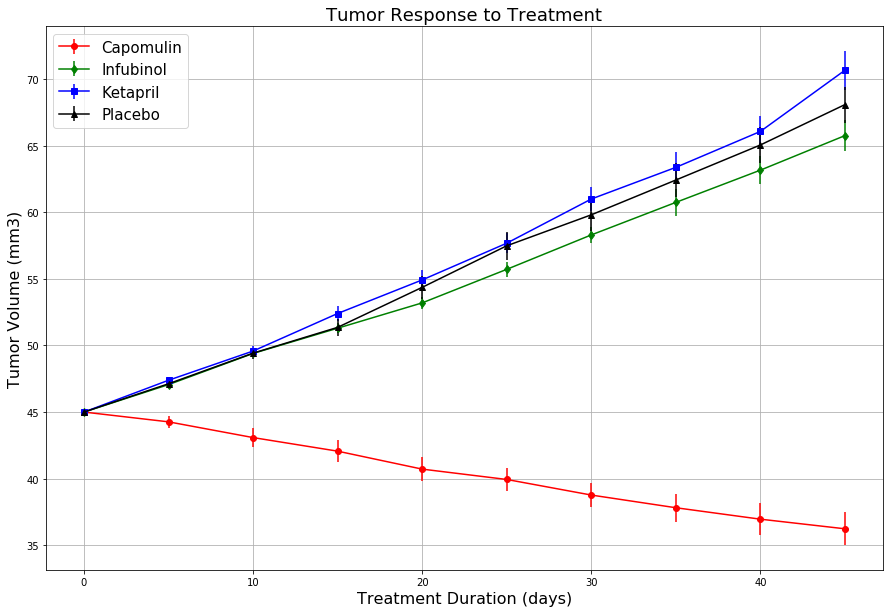

In [77]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=(15,10))
time = timepoint_drug_vol_df.index.values

# Plot Capomulin
capomulin_vol = timepoint_drug_vol_df.Capomulin.values
standard_errors = timepoint_drug_sem_df.Capomulin.values
ax.errorbar(time, capomulin_vol, standard_errors, marker="o", color="red", linestyle="solid", label="Capomulin")

# Plot Infubinol
infubinol_vol = timepoint_drug_vol_df.Infubinol.values
standard_errors = timepoint_drug_sem_df.Infubinol.values
ax.errorbar(time, infubinol_vol, standard_errors, marker="d", color="green", linestyle="solid", label="Infubinol")

# Plot Ketapril
ketapril_vol = timepoint_drug_vol_df.Ketapril.values
standard_errors = timepoint_drug_sem_df.Ketapril.values
ax.errorbar(time, ketapril_vol, standard_errors, marker="s", color="blue", linestyle="solid", label="Ketapril")

# Plot Placebo
placebo_vol = timepoint_drug_vol_df.Placebo.values
standard_errors = timepoint_drug_sem_df.Placebo.values
ax.errorbar(time, placebo_vol, standard_errors, marker="^", color="black", linestyle="solid", label="Placebo")

# Annotate figure
plt.title("Tumor Response to Treatment", fontsize="18")
plt.xlabel("Treatment Duration (days)", fontsize="16")
plt.ylabel("Tumor Volume (mm3)", fontsize="16")
plt.legend(loc="best", prop={'size': 15})
plt.grid()

# Save the Figure
plt.savefig("plots/Tumor Response to Treatment.png")


## Metastatic Response to Treatment

In [78]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastasis = mouse_cltrial_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
mean_metastasis_df = pd.DataFrame(mean_metastasis)

# Preview DataFrame
mean_metastasis_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [79]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_metastasis = mouse_cltrial_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
sem_metastasis_df = pd.DataFrame(sem_metastasis)
sem_metastasis_df = sem_metastasis_df.rename(columns={"Metastatic Sites" : "SEM of Metastatic Sites"})

# Preview DataFrame
sem_metastasis_df.head()

SEM of Metastatic Sites
Drug      Timepoint                         
Capomulin 0                         0.000000
          5                         0.074833
          10                        0.125433
          15                        0.132048
          20                        0.161621

In [80]:
# Minor Data Munging to Re-Format the Data Frames
timepoint_metastasis_df = mean_metastasis_df.pivot_table("Metastatic Sites", ["Timepoint"], "Drug")
timepoint_metastasis_sem_df = sem_metastasis_df.pivot_table("SEM of Metastatic Sites", ["Timepoint"], "Drug")

# Preview that Reformatting worked
timepoint_metastasis_sem_df.head()
timepoint_metastasis_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


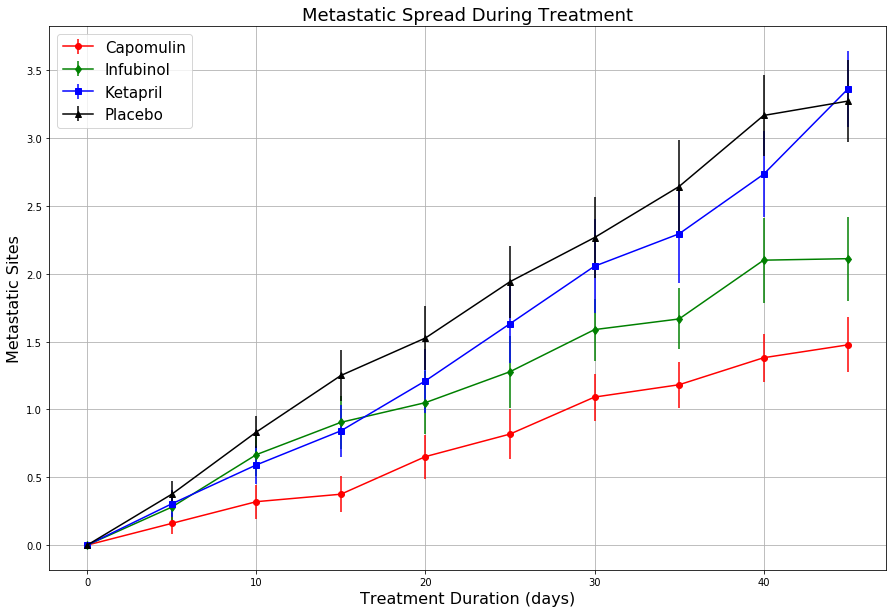

In [81]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=(15,10))
time = timepoint_metastasis_df.index.values

# Plot Capomulin
capomulin_vol = timepoint_metastasis_df.Capomulin.values
standard_errors = timepoint_metastasis_sem_df.Capomulin.values
ax.errorbar(time, capomulin_vol, standard_errors, marker="o", color="red", linestyle="solid", label="Capomulin")

# Plot Infubinol
infubinol_vol = timepoint_metastasis_df.Infubinol.values
standard_errors = timepoint_metastasis_sem_df.Infubinol.values
ax.errorbar(time, infubinol_vol, standard_errors, marker="d", color="green", linestyle="solid", label="Infubinol")

# Plot Ketapril
ketapril_vol = timepoint_metastasis_df.Ketapril.values
standard_errors = timepoint_metastasis_sem_df.Ketapril.values
ax.errorbar(time, ketapril_vol, standard_errors, marker="s", color="blue", linestyle="solid", label="Ketapril")

# Plot Placebo
placebo_vol = timepoint_metastasis_df.Placebo.values
standard_errors = timepoint_metastasis_sem_df.Placebo.values
ax.errorbar(time, placebo_vol, standard_errors, marker="^", color="black", linestyle="solid", label="Placebo")

# Annotate figure
plt.title("Metastatic Spread During Treatment", fontsize="18")
plt.xlabel("Treatment Duration (days)", fontsize="16")
plt.ylabel("Metastatic Sites", fontsize="16")
plt.legend(loc="best", prop={'size': 15})
plt.grid()

# Save the Figure
plt.savefig("plots/Metastatic Spread During Treatment.png")


## Survival Rates

In [82]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_survival_df = mouse_cltrial_df.groupby(["Drug", "Timepoint"], as_index = False)["Mouse ID"].count()

# Convert to DataFrame
mouse_survival_df = pd.DataFrame(mouse_survival_df)
mouse_survival_df = mouse_survival_df.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
mouse_survival_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [83]:
# Minor Data Munging to Re-Format the Data Frames
timepoint_survival_df = mouse_survival_df.pivot_table("Mouse Count", ["Timepoint"], "Drug")

# Preview the Data Frame
timepoint_survival_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


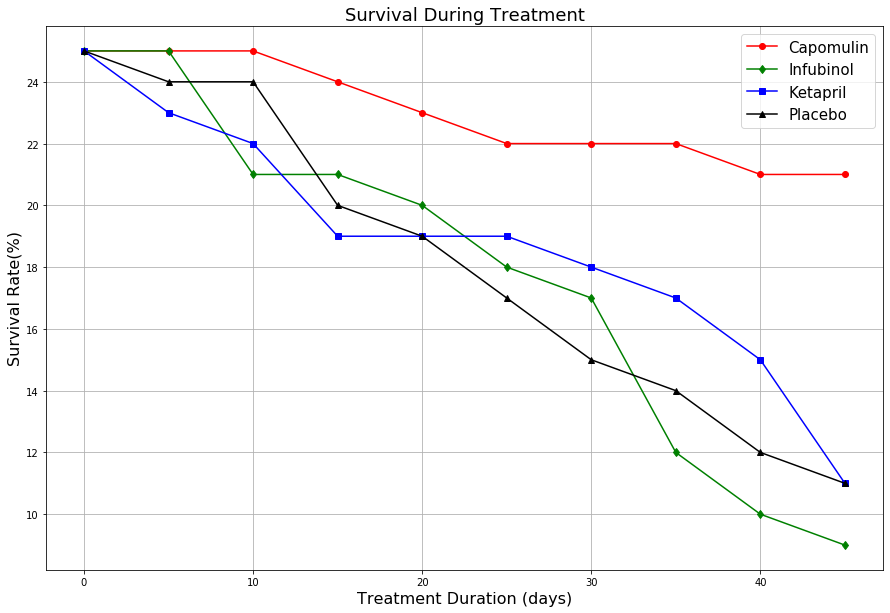

In [84]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots(figsize=(15,10))
time = timepoint_survival_df.index.values

# Plot Capomulin
capomulin_sur = timepoint_survival_df.Capomulin.values
plt.plot(time, capomulin_sur, marker="o", color="red", linestyle="solid", label="Capomulin")

# Plot Infubinol
infubinol_sur = timepoint_survival_df.Infubinol.values
plt.plot(time, infubinol_sur, marker="d", color="green", linestyle="solid", label="Infubinol")

# Plot Ketapril
ketapril_sur = timepoint_survival_df.Ketapril.values
plt.plot(time, ketapril_sur, marker="s", color="blue", linestyle="solid", label="Ketapril")

# Plot Placebo
placebo_sur = timepoint_survival_df.Placebo.values
plt.plot(time, placebo_sur, marker="^", color="black", linestyle="solid", label="Placebo")


# Annotate figure
plt.title("Survival During Treatment", fontsize="18")
plt.xlabel("Treatment Duration (days)", fontsize="16")
plt.ylabel("Survival Rate(%)", fontsize="16")
plt.legend(loc="best", prop={'size': 15})
plt.grid()

# Save the Figure
plt.savefig("plots/Survival During Treatment.png")

## Summary Bar Graph

In [85]:
# Calculate the percent changes for each drug
mean_tumor_df = mean_tumor_vol_df.drop(["Timepoint"], axis=1)
mean_tumor_grouped = mean_tumor_df.groupby(["Drug"])   
percent_changes = (mean_tumor_grouped["Tumor Volume (mm3)"].last() - mean_tumor_grouped["Tumor Volume (mm3)"].first()) / mean_tumor_grouped["Tumor Volume (mm3)"].first() * 100

# Display the data to confirm
percent_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Tumor Volume (mm3), dtype: float64

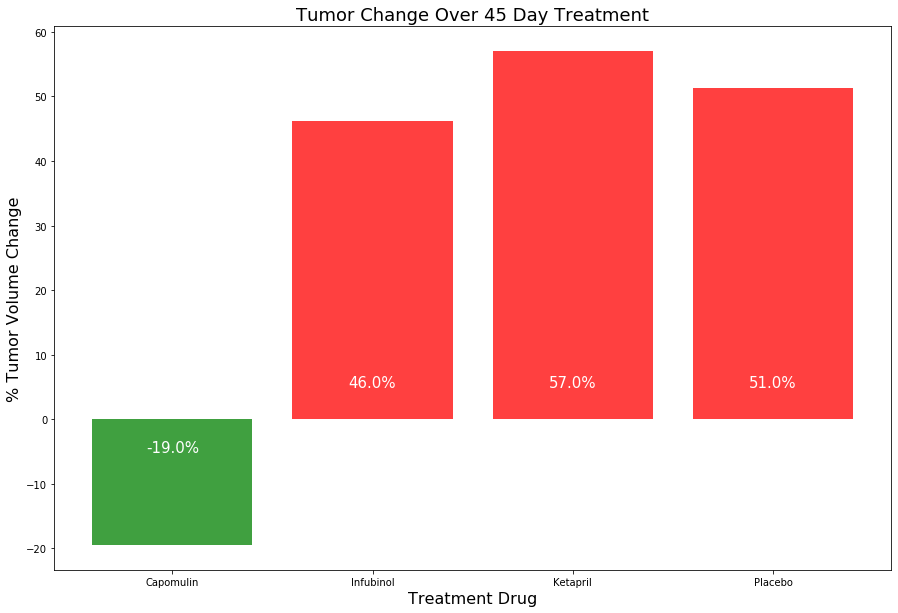

In [86]:
# Store all Relevant Percent Changes into a Tuple
pct_list = pd.DataFrame(percent_changes)
pct_list = pct_list.reset_index()
pct_list = pct_list.loc[[0,2,3,5],:]

pct_changes = pct_list["Tumor Volume (mm3)"]

# Create axes and plot
fig, ax = plt.subplots(figsize=(15,10))
drugs = pct_list["Drug"]
pct_changes = pct_list["Tumor Volume (mm3)"]
colors = ["g","r","r","r"]

plt.bar(drugs, pct_changes, color=colors , alpha=0.75, align="center")
    
# Orient widths. Add labels, tick marks, etc. 

plt.title("Tumor Change Over 45 Day Treatment", fontsize="18")
plt.xlabel("Treatment Drug", fontsize="16")
plt.ylabel("% Tumor Volume Change", fontsize="16")

# Use functions to label the percentages of changes
position = 0
for drug in pct_changes:
    if drug < 0:
        label_at = -5
    else:
        label_at = 5
    plt.text(position, label_at, str(round(drug, 0)) + '%', ha="center", color="white", fontsize= "15")
    position += 1

# Call functions to implement the function calls


# Save the Figure
plt.savefig("plots/TumorChange.png")

## Conclusion

    In this analysis, we looked at the potential effects of different drugs on cancer development in mice based on experiments conducted by a pharmaceutical company. 
    Based upon the results of the analysis, of the three drugs (Capomulin, Infubinol, Ketapril) examined, Capomulin was the only drug that performed better than the placebo in reducing tumor size for the duration of the treatment, with a 19% decrease. 
    The fewest metastatic sites formed during the treatment with Capomulin.
    Capomulin had the lowest mice death rate among the drugs examined. 
    Based on these results alone, Capomulin should be the drug chosen to treat this type of carcinoma.